In [1]:
import pandas as pd
cars_data = pd.read_csv('Car_price_2024.csv')
cars_data.head()

,Model,Year,Fuel_Type,Transmission,DoorsNum,Condition,Color,Cruise,Leather_Seats,Heated_Seats,...,Price,Cylinder_Numbers,Credit_History,Engine_Size,Weight,carlength,carwidth,monthly_mileage,peakrpm,Estimated_Mileage
0,Nissan Altima,2007,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,8005.469674,two,0.004967,1.655688,3170.460434,179.1,68.1,3020.474750,6000,36245.697
1,Toyota Corolla,2019,Electric,Manual,4.0,Excellent,Beige,Yes,No,Yes,...,25385.241860,two,-0.001383,2.696626,3543.00629,182.1,60.0,894.742606,4689,10736.91127
2,Honda CR-V,2004,Petrol,Manual,4.0,Fair,Brown,No,No,No,...,6553.601733,three,0.006477,1.642471,3125.542396,161.0,67.5,3496.160436,5190,41953.92523
3,Toyota Corolla,2020,Electric,Manual,4.0,Good,Brown,Yes,Yes,Yes,...,24381.083350,three,0.015230,2.044309,3340.060049,169.7,65.2,1037.247974,5720,12446.97569
4,Toyota Tundra,2017,Hybrid,Automatic,4.0,Good,Brown,Yes,No,No,...,28357.830640,five,-0.002342,2.586011,3847.825597,176.0,68.1,880.045753,4559,10560.54904


In [2]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2230 non-null   object 
 1   Year               2230 non-null   int64  
 2   Fuel_Type          2227 non-null   object 
 3   Transmission       2223 non-null   object 
 4   DoorsNum           2223 non-null   float64
 5   Condition          2230 non-null   object 
 6   Color              2228 non-null   object 
 7   Cruise             2230 non-null   object 
 8   Leather_Seats      2230 non-null   object 
 9   Heated_Seats       2230 non-null   object 
 10  Navigation         2230 non-null   object 
 11  Owners             2230 non-null   int64  
 12  Insurance          2230 non-null   object 
 13  Service_History    2230 non-null   object 
 14  Safety             2230 non-null   object 
 15  Premium_Sound      2230 non-null   object 
 16  Multimedia         2230 

In [3]:
cars_data.isnull().count()

Model                2230
Year                 2230
Fuel_Type            2230
Transmission         2230
DoorsNum             2230
Condition            2230
Color                2230
Cruise               2230
Leather_Seats        2230
Heated_Seats         2230
Navigation           2230
Owners               2230
Insurance            2230
Service_History      2230
Safety               2230
Premium_Sound        2230
Multimedia           2230
Bluetooth            2230
Wheel                2230
Sunroof              2230
Warranty             2230
TAge                 2230
Price                2230
Cylinder_Numbers     2230
Credit_History       2230
Engine_Size          2230
Weight               2230
carlength            2230
carwidth             2230
monthly_mileage      2230
peakrpm              2230
Estimated_Mileage    2230
dtype: int64

## Feature selection


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Separate the target variable (Price) and predictors
X = cars_data.drop('Price', axis=1)
y = cars_data['Price']

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: impute missing values and scale features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model
clf.fit(X_train, y_train)

# Get predictions and calculate mean squared error
predictions = clf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
    
# Feature importances
feature_importances = clf.named_steps['model'].feature_importances_

# Get feature names after preprocessing
ohe_columns = list(clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_cols))
feature_names = numerical_cols.tolist() + ohe_columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

mse, sorted_feature_importance.head(20)

(3014938.7863628115,
                             Feature  Importance
 0                   monthly_mileage    0.938227
 1              Cylinder_Numbers_six    0.006918
 2                       Engine_Size    0.005797
 3                      Color_Silver    0.004992
 4                            Owners    0.004287
 5               Insurance_Collision    0.002294
 6                          carwidth    0.001795
 7                              Year    0.001792
 8                           peakrpm    0.001767
 9                    Credit_History    0.001700
 10                        carlength    0.001485
 11     Service_History_Full Service    0.001412
 12                    Safety_1 star    0.001307
 13                         Warranty    0.001204
 14                   Safety_5 stars    0.001063
 15         Safety_Not rated/Unknown    0.001004
 16                 Fuel_Type_Petrol    0.000871
 17                 Leather_Seats_No    0.000784
 18  Service_History_Partial Service    0.000741

## Dimensions of the dataset


In [5]:
# Dimensions of the dataset
dataset_dimensions = cars_data.shape
dataset_dimensions


(2230, 32)

## Uni-variate visualization of Price

Text(0, 0.5, 'Frequency')

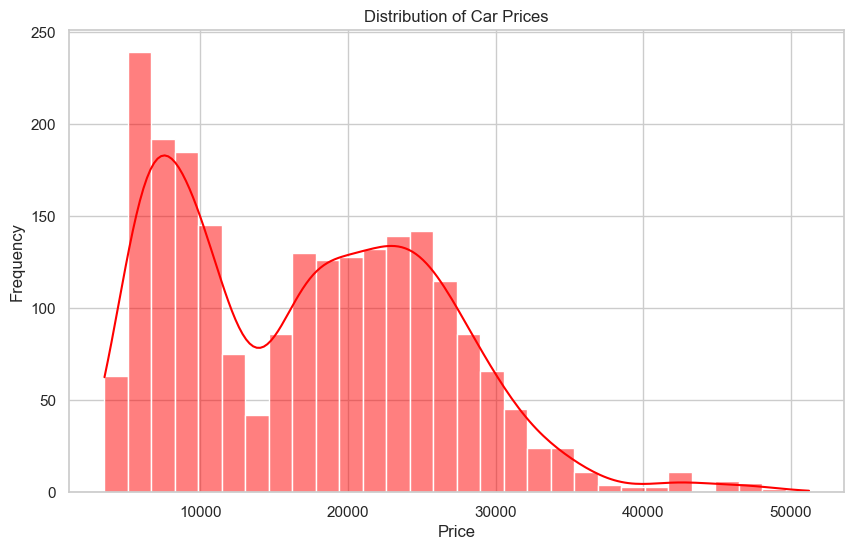

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style
sns.set(style="whitegrid")

# Uni-variate visualization of the Price variable
plt.figure(figsize=(10, 6))
sns.histplot(cars_data['Price'], kde=True, bins=30, color='Red')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

## Measure of centrality and spread of Price

In [7]:
# Display measures of centrality and spread
price_mean = cars_data['Price'].mean()
price_median = cars_data['Price'].median()
price_std = cars_data['Price'].std()

price_mean, price_median, price_std

(17241.51104836547, 17393.385485, 8961.471366791226)

## Uni-variate visualization of monthly_mileage

Text(0, 0.5, 'Frequency')

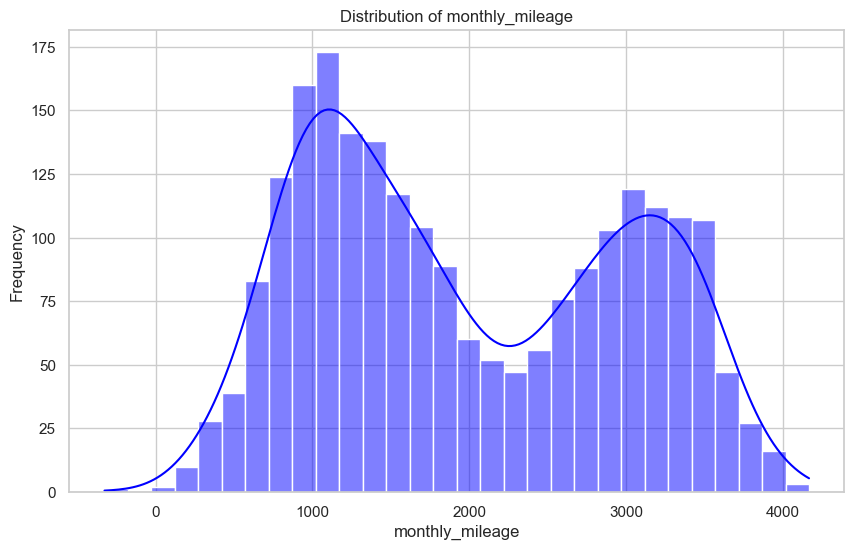

In [8]:
# Setting seaborn style
sns.set(style="whitegrid")

# Uni-variate visualization of the monthly_mileage variable
plt.figure(figsize=(10, 6))
sns.histplot(cars_data['monthly_mileage'], kde=True, bins=30, color='blue')
plt.title('Distribution of monthly_mileage')
plt.xlabel('monthly_mileage')
plt.ylabel('Frequency')

## Measure of centrality and spread of monthly_mileage

In [9]:
# Display measures of centrality and spread
monthly_mileage_mean = cars_data['monthly_mileage'].mean()
monthly_mileage_median = cars_data['monthly_mileage'].median()
monthly_mileage_std = cars_data['monthly_mileage'].std()

monthly_mileage_mean, monthly_mileage_median, monthly_mileage_std

(1986.5937412374974, 1758.5143014999999, 994.4083639242328)

## Uni-variate visualization of Year

Text(0, 0.5, 'Frequency')

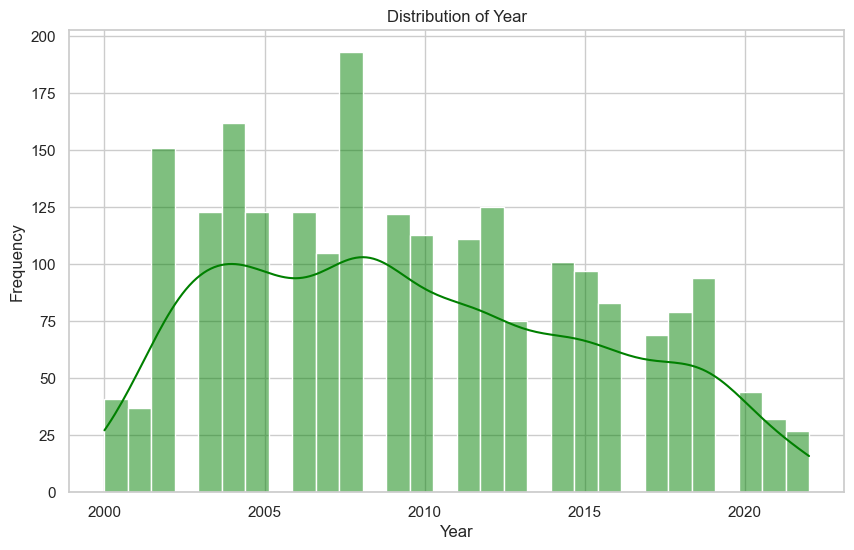

In [10]:
# Setting seaborn style
sns.set(style="whitegrid")

# Uni-variate visualization of the Year variable
plt.figure(figsize=(10, 6))
sns.histplot(cars_data['Year'], kde=True, bins=30, color='Green')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

## Measure of centrality and spread of Year

In [11]:
# Display measures of centrality and spread
Year_mean = cars_data['Year'].mean()
Year_median = cars_data['Year'].median()
Year_std = cars_data['Year'].std()

Year_mean, Year_median, Year_std

(2009.7022421524664, 2009.0, 5.676736972948801)

## Bi-variate visualization (Scatterplot)

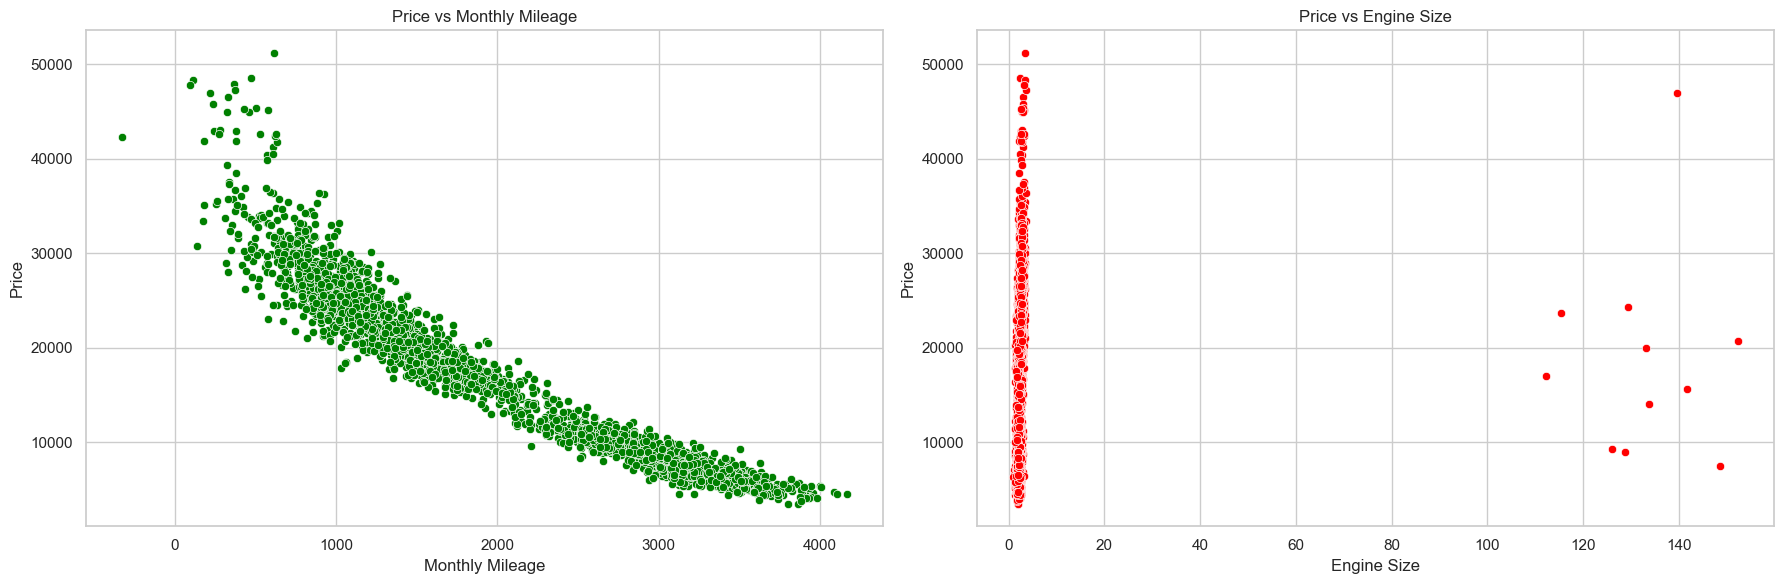

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Price vs Monthly Mileage
sns.scatterplot(x=cars_data['monthly_mileage'], y=cars_data['Price'], ax=ax[0], color='green')
ax[0].set_title('Price vs Monthly Mileage')
ax[0].set_xlabel('Monthly Mileage')
ax[0].set_ylabel('Price')

# Price vs Engine Size
sns.scatterplot(x=cars_data['Engine_Size'], y=cars_data['Price'], ax=ax[1], color='red')
ax[1].set_title('Price vs Engine Size')
ax[1].set_xlabel('Engine Size')
ax[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

## Bi-variate visualization (Boxplot) Color Insurance

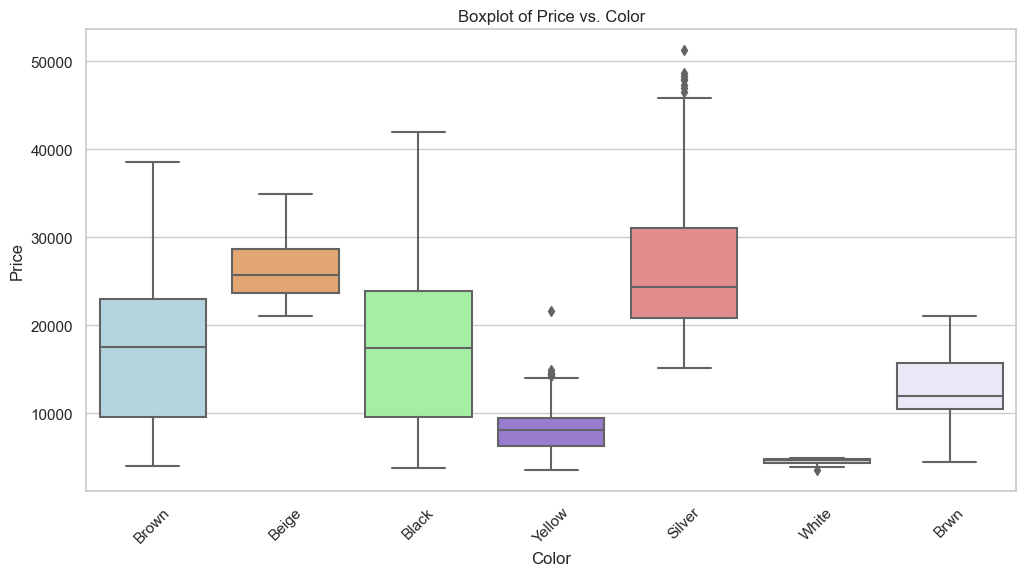

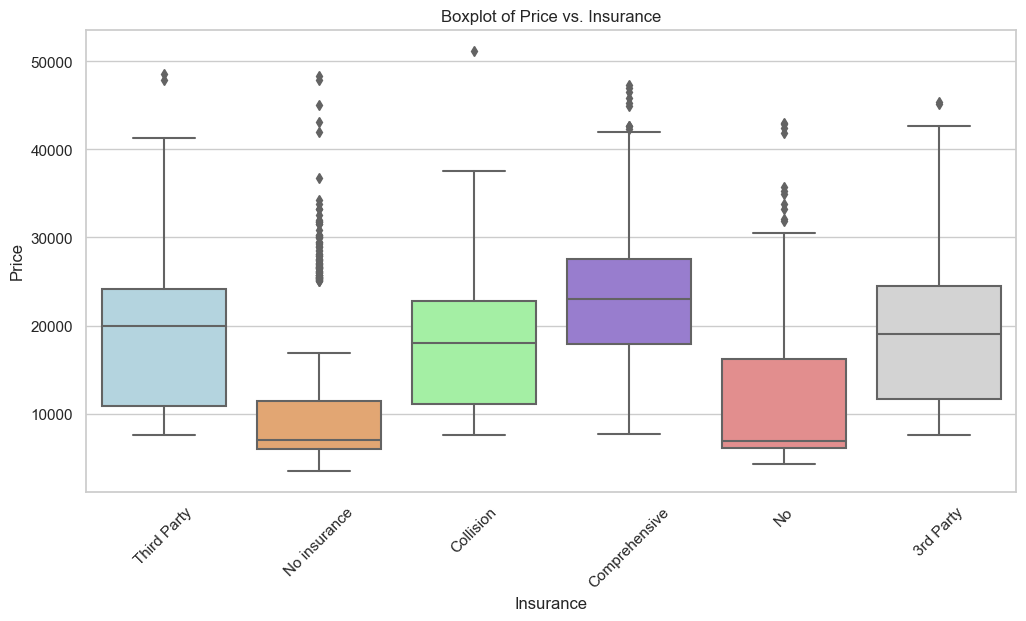

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot for Price vs. Color
palette = ['lightblue', 'sandybrown', 'palegreen', 'mediumpurple', 'lightcoral', 'lightgray', 'lavender']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Color', y='Price', data= cars_data, palette=palette)
plt.title('Boxplot of Price vs. Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Adjust as needed for readability
plt.show()

#Boxplot for Price vs. Insurance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Insurance', y='Price', data= cars_data, palette=palette)
plt.title('Boxplot of Price vs. Insurance')
plt.xlabel('Insurance')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Adjust as needed for readability
plt.show()

## Missing values

In [15]:
# Checking for missing values in the specified variables
specified_variables = ['monthly_mileage', 'Cylinder_Numbers', 'Engine_Size', 'Owners', 'Year', 'peakrpm', 
                       'Color', 'Insurance', 'carwidth', 'Credit_History']
missing_values = cars_data[specified_variables].isnull().sum()

# Treating missing values - We will use simple imputation where necessary
# For numerical variables, we use the mean. For categorical variables, we use the mode (most frequent value)
# Note: We previously identified Cylinder_Numbers and Color as important, and we are treating Color as a categorical variable with "Silver" being of specific interest

# Imputing missing values (for demonstration, assuming this is required based on the output above)
# We'll only apply imputation if there are indeed missing values to be addressed

missing_values_summary = missing_values[missing_values > 0]

missing_values_summary


Color    2
dtype: int64

In [16]:
# Since 'Color' is the only variable with missing values, we impute these with the most frequent value
most_frequent_color = cars_data['Color'].mode()[0]

# Imputing missing values with the most frequent color
cars_data['Color'].fillna(most_frequent_color, inplace=True)

# Re-checking for missing values in 'Color' to confirm the treatment
missing_values_after = cars_data['Color'].isnull().sum()
missing_values_after

0

## Outliers

In [17]:
# Identifying outliers using the IQR method for the numerical variables
numerical_variables = ['monthly_mileage', 'Engine_Size', 'Owners', 'Year', 'peakrpm', 'carwidth', 'Credit_History']

# Calculating Q1, Q3, and IQR for each numerical variable
Q1 = cars_data[numerical_variables].quantile(0.25)
Q3 = cars_data[numerical_variables].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those beyond 1.5 times the IQR from the quartiles
outlier_bounds = pd.concat([Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], axis=1, keys=['Lower Bound', 'Upper Bound'])

# Counting outliers for each numerical variable
outlier_counts = {}
for variable in numerical_variables:
    outliers = cars_data[(cars_data[variable] < (Q1[variable] - 1.5 * IQR[variable])) | 
                          (cars_data[variable] > (Q3[variable] + 1.5 * IQR[variable]))]
    outlier_counts[variable] = len(outliers)

outlier_counts, outlier_bounds


({'monthly_mileage': 0,
  'Engine_Size': 22,
  'Owners': 199,
  'Year': 0,
  'peakrpm': 0,
  'carwidth': 0,
  'Credit_History': 20},
                  Lower Bound  Upper Bound
 monthly_mileage -1619.633390  5676.918901
 Engine_Size         1.219715     3.354398
 Owners              0.500000     4.500000
 Year             1991.500000  2027.500000
 peakrpm          2849.625000  7840.625000
 carwidth           53.050000    79.850000
 Credit_History     -0.025668     0.026165)

## Handling errors in Owners, Engine size and Credit History column

In [18]:
# Correcting the values in the 'Owners' column again, just to ensure it's done correctly
cars_data['Owners'] = cars_data['Owners'].replace({22: 2, 44: 4})

# Recalculating Q1, Q3, and IQR for 'Owners'
Q1_owners_corrected = cars_data['Owners'].quantile(0.25)
Q3_owners_corrected = cars_data['Owners'].quantile(0.75)
IQR_owners_corrected = Q3_owners_corrected - Q1_owners_corrected

# Identifying outliers for 'Owners' after correction
outliers_owners_corrected = cars_data[(cars_data['Owners'] < (Q1_owners_corrected - 1.5 * IQR_owners_corrected)) | 
                                      (cars_data['Owners'] > (Q3_owners_corrected + 1.5 * IQR_owners_corrected))]

# Counting outliers after correction
outlier_count_owners_after_correction_corrected = len(outliers_owners_corrected)

# Bounds for 'Owners' after correction
lower_bound_owners_corrected, upper_bound_owners_corrected = Q1_owners_corrected - 1.5 * IQR_owners_corrected, Q3_owners_corrected + 1.5 * IQR_owners_corrected

outlier_count_owners_after_correction_corrected, (lower_bound_owners_corrected, upper_bound_owners_corrected)


(11, (0.5, 4.5))

In [19]:
# Treating outliers for 'Engine Size' and 'Credit History' by capping and flooring
for variable in ['Engine_Size', 'Credit_History']:
    lower_bound, upper_bound = outlier_bounds.loc[variable, 'Lower Bound'], outlier_bounds.loc[variable, 'Upper Bound']
    cars_data[variable] = cars_data[variable].clip(lower=lower_bound, upper=upper_bound)

# Rechecking outlier counts after treatment for verification
rechecked_outlier_counts = {}
for variable in ['Engine_Size', 'Credit_History']:
    outliers_after_treatment = cars_data[(cars_data[variable] < (Q1[variable] - 1.5 * IQR[variable])) | 
                                          (cars_data[variable] > (Q3[variable] + 1.5 * IQR[variable]))]
    rechecked_outlier_counts[variable] = len(outliers_after_treatment)

rechecked_outlier_counts


{'Engine_Size': 0, 'Credit_History': 0}

## Missing Values

In [20]:
# Checking for any remaining missing values in the entire dataset after the treatments
remaining_missing_values = cars_data.isnull().sum()

# Filtering out columns with missing values if any exist
remaining_missing_values_summary = remaining_missing_values[remaining_missing_values > 0]

remaining_missing_values_summary


Fuel_Type       3
Transmission    7
DoorsNum        7
Weight          1
dtype: int64

In [21]:
# Filling missing values for numerical variables with their median
for column in numerical_cols:
    if column in cars_data.columns:  # Ensure the column exists in the current dataset
        cars_data[column].fillna(cars_data[column].median(), inplace=True)

# Filling missing values for categorical variables with their mode (most frequent value)
for column in categorical_cols:
    if column in cars_data.columns:  # Ensure the column exists in the current dataset
        cars_data[column].fillna(cars_data[column].mode()[0], inplace=True)

# Re-checking for any remaining missing values after filling
remaining_missing_values_after_filling = cars_data.isnull().sum().sum()

remaining_missing_values_after_filling


0

In [21]:
# Assuming 'cars_data' is your updated DataFrame
cars_data.to_csv('Updated_Car_price_2024.csv', index=False)


## Saving the dataset

In [22]:
# Saving the updated dataset to a CSV file
updated_data_path = 'C:/Users/Yash/Desktop/Corrected_Car_price_2024.csv'
cars_data.to_csv(updated_data_path, index=False)

# Providing the file path for download
updated_data_path

'C:/Users/Yash/Desktop/Corrected_Car_price_2024.csv'

In [24]:
#reading new dataset
df = pd.read_csv('Corrected_car_price_2024.csv')

## Linear Regression Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Selecting the specified variables and the target variable
features = ['monthly_mileage', 'Cylinder_Numbers', 'Engine_Size', 'Owners', 'Year', 'peakrpm', 
            'Color', 'Insurance', 'carwidth', 'Credit_History']
target = 'Price'

# Preparing the data
X = df[features]
y = df[target]

# Defining numerical and categorical columns
num_cols = ['monthly_mileage', 'Engine_Size', 'Owners', 'Year', 'peakrpm', 'carwidth', 'Credit_History']
cat_cols = ['Cylinder_Numbers', 'Color', 'Insurance']

# Creating the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline that includes the preprocessor and the linear regression model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('linear_regression', LinearRegression())])

# Training the model
lr_pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_pipeline.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)


rmse , r2_lr


(2258.506986812764, 0.9287966645127269)

## Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

# Setting up the Random Forest Regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('random_forest', RandomForestRegressor(random_state=42))])

# Training the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predicting on the test set with Random Forest
y_pred_rf = rf_pipeline.predict(X_test)

# Calculating evaluation metrics for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Setting up the Artificial Neural Network
# ann_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('mlp', MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', 
#                                                     random_state=42, max_iter=500))])

# Training the ANN model
# ann_pipeline.fit(X_train, y_train)

# Predicting on the test set with ANN
# y_pred_ann = ann_pipeline.predict(X_test)

# Calculating evaluation metrics for ANN
# rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
# mae_ann = mean_absolute_error(y_test, y_pred_ann)
# r2_ann = r2_score(y_test, y_pred_ann)

(rmse_rf, mae_rf, r2_rf)
# , (rmse_ann, mae_ann, r2_ann)


(1731.3479729036292, 1235.0799967602466, 0.9581566750375821)

## Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeRegressor

# Setting up the Decision Tree Regressor
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('decision_tree', DecisionTreeRegressor(random_state=42))])

# Training the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Predicting on the test set with Decision Tree
y_pred_dt = dt_pipeline.predict(X_test)

# Calculating evaluation metrics for Decision Tree
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

rmse_dt, mae_dt, r2_dt


(2416.850197827935, 1703.3245767735425, 0.9184625872389591)

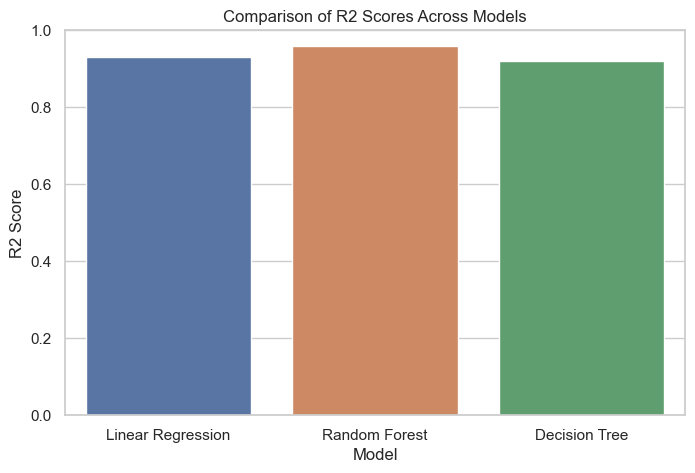

In [37]:
# Assuming the R2 values for Linear Regression, Random Forest, and Decision Tree
r2_values = {
    'Linear Regression': 0.93,
    'Random Forest': 0.96,
    'Decision Tree': 0.92
}

# Converting the dictionary to a pandas DataFrame for plotting
models_df = pd.DataFrame(list(r2_values.items()), columns=['Model', 'R2 Score'])

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2 Score', data=models_df)
plt.title('Comparison of R2 Scores Across Models')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # Setting the limit to show full scale up to 1 for R2 Score
plt.show()


## Try to improve RF

In [39]:
from sklearn.model_selection import GridSearchCV

# Defining a small grid of parameters to search
param_grid = {
    'random_forest__n_estimators': [100, 200],
    'random_forest__max_depth': [None, 10, 20],
}

# Setting up the grid search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Performing the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and RMSE for Random Forest after grid search
best_params = grid_search.best_params_
best_rmse_rf = np.sqrt(-grid_search.best_score_)
r2_rf2 = r2_score(y_test, y_pred_rf)
best_params, best_rmse_rf, r2_rf2


({'random_forest__max_depth': 10, 'random_forest__n_estimators': 200},
 1911.4993514396256,
 0.9581566750375821)